In [82]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


%matplotlib inline 

## Models

from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


import time
print(f"Last updated: {time.asctime()}")

Last updated: Tue Jan 30 18:50:51 2024


In [72]:
df = pd.read_csv("heart.csv") 
df.shape

(1025, 14)

In [43]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [44]:
df.target.value_counts()


target
1    526
0    499
Name: count, dtype: int64

In [45]:
df.target.value_counts(normalize=True)

target
1    0.513171
0    0.486829
Name: proportion, dtype: float64

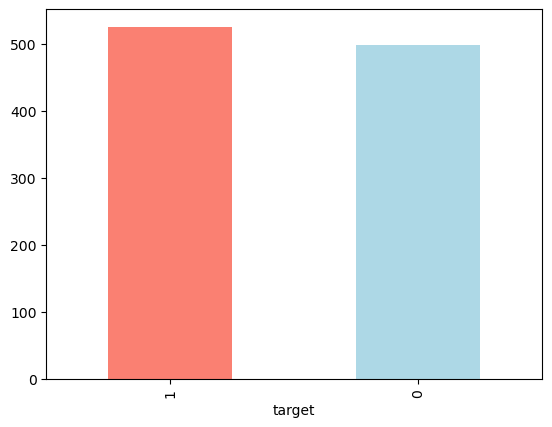

In [46]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [48]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [49]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [50]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


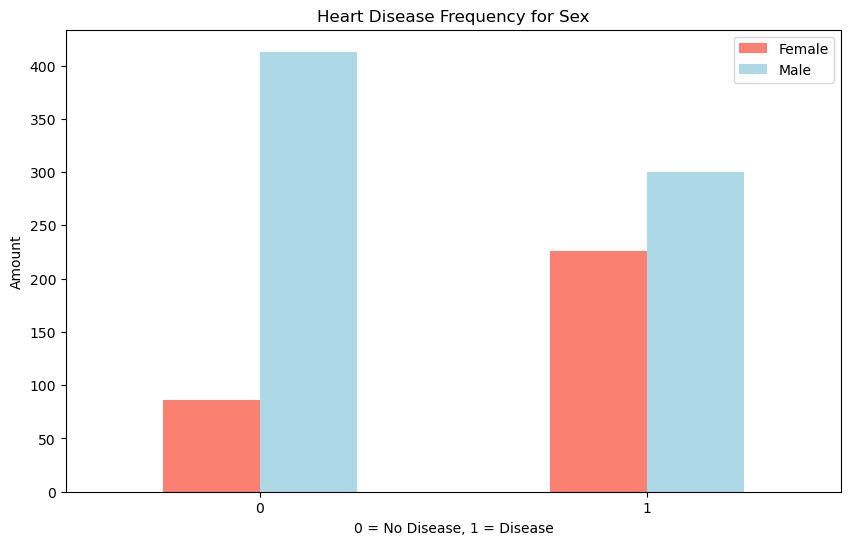

In [51]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])


plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); 

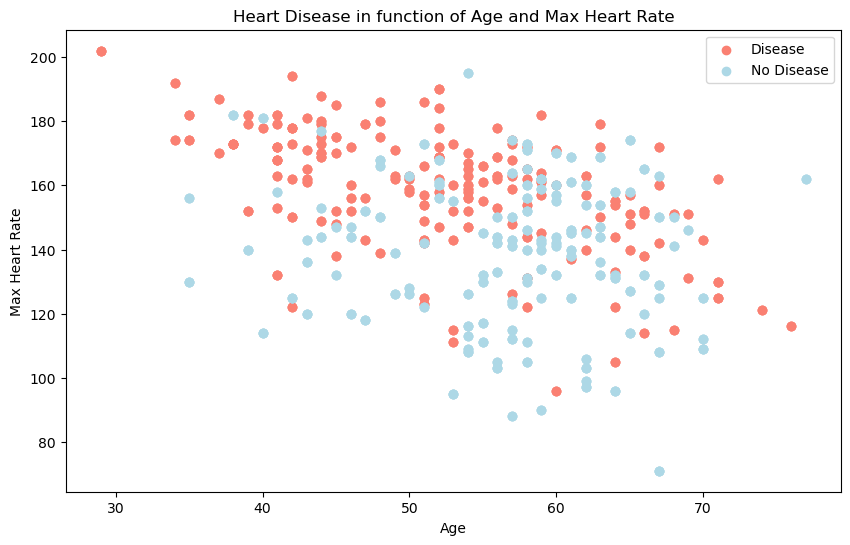

In [52]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") 
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") 
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

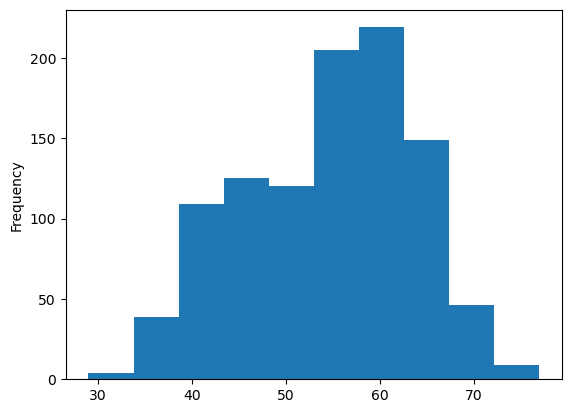

In [53]:
df.age.plot.hist();

In [54]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

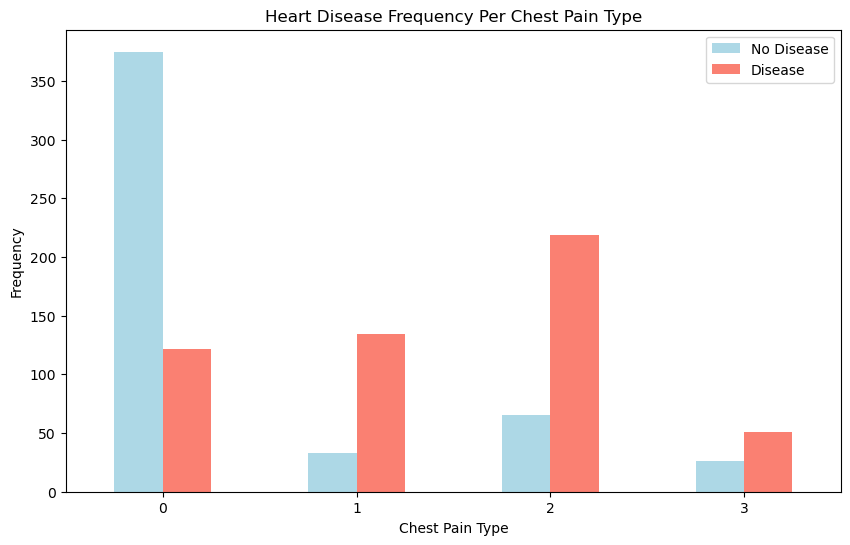

In [55]:
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])


plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0)

In [56]:
corr_matrix = df.corr()
corr_matrix 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


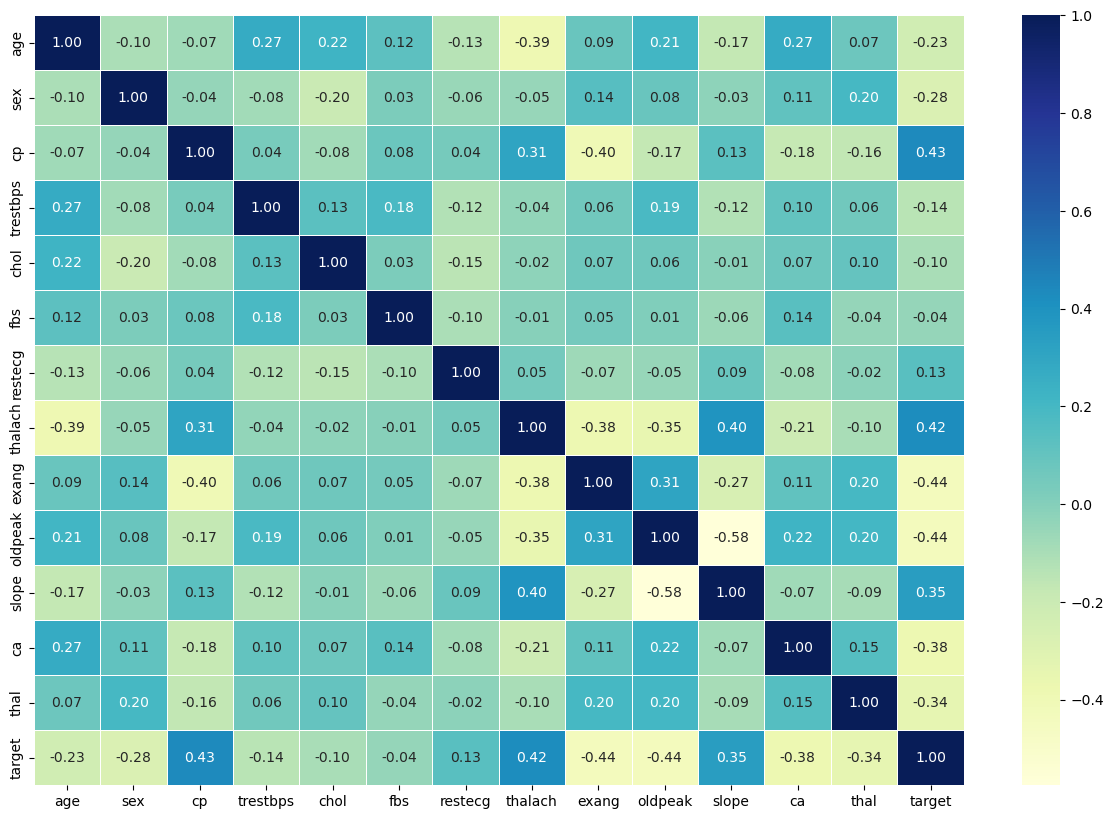

In [57]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

# Modeling


In [58]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [59]:
X = df.drop("target", axis=1)

y = df.target.values

In [60]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [61]:
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [62]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [63]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2


In [64]:
y_train, len(y_train)

(array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 

In [65]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3


In [66]:
y_test, len(y_test)

(array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0], dtype=int64),
 205)

In [67]:
model=RandomForestClassifier(n_estimators = 100)
np.random.seed(42)
model.fit(X_train, y_train)
model.score(X_test, y_test)



0.9853658536585366

In [68]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [69]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [70]:
rs_rf.score(X_test, y_test)

0.926829268292683

In [74]:
score = cross_val_score(model, X, y, cv=20)
print(f"Accuracy = {np.mean(score)*100:.2f}%")

Accuracy = 99.71%


In [75]:
y_probs = model.predict_proba(X_test)
y_probs

array([[0.01, 0.99],
       [0.04, 0.96],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.06, 0.94],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.1 , 0.9 ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.06, 0.94],
       [1.  , 0.  ],
       [0.89, 0.11],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.04, 0.96],
       [0.99, 0.01],
       [0.55, 0.45],
       [0.98, 0.02],
       [0.89, 0.11],
       [0.99, 0.01],
       [0.55, 0.45],
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.86, 0.14],
       [1.  , 0.  ],
       [0.11, 0.89],
       [0.9 , 0.1 ],
       [0.04, 0.96],
       [0.03, 0.97],
       [0.  , 1.  ],
       [0.55, 0.45],
       [0.06, 0.94],
       [0.03, 0.97],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.94, 0.06],
       [0.23, 0.77],
       [0.89, 0.11],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.95,

In [76]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.99, 0.96, 0.  , 1.  , 0.01, 0.94, 0.03, 0.  , 0.98, 0.  , 0.9 ,
       0.01, 1.  , 0.94, 0.  , 0.11, 0.  , 1.  , 0.96, 0.01, 0.45, 0.02,
       0.11, 0.01, 0.45, 1.  , 0.98, 0.97, 0.01, 0.14, 0.  , 0.89, 0.1 ,
       0.96, 0.97, 1.  , 0.45, 0.94, 0.97, 1.  , 0.  , 0.06, 0.77, 0.11,
       0.  , 0.03, 0.04, 0.05, 0.02, 0.77, 0.91, 0.  , 0.35, 0.  , 0.98,
       0.97, 0.02, 0.01, 0.3 , 1.  , 0.97, 0.98, 0.01, 0.77, 0.01, 0.04,
       1.  , 0.09, 0.03, 0.98, 0.26, 0.01, 0.03, 1.  , 0.97, 0.98, 0.03,
       0.11, 0.1 , 1.  , 0.03, 0.  , 0.  , 0.  , 0.96, 0.01, 0.9 , 0.02,
       0.03, 0.14, 0.03, 0.01, 0.95, 1.  , 0.97, 1.  , 0.09, 0.05, 0.  ,
       0.  , 0.85, 0.07, 0.12, 0.93, 0.  , 0.98, 0.01, 0.93, 0.02, 1.  ,
       0.3 , 1.  , 1.  , 0.02, 0.97, 0.99, 0.08, 0.96, 0.9 , 0.  , 0.95,
       0.91, 0.  , 0.01, 0.92, 0.01, 0.93, 0.  , 0.26, 1.  , 0.89, 0.  ,
       1.  , 0.85, 0.  , 0.98, 0.02, 0.91, 0.98, 0.08, 0.85, 0.94, 0.99,
       0.87, 0.99, 0.92, 0.91, 0.99, 0.04, 0.  , 0.

In [80]:
fpr, tpr, thresholds =roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05882353, 0.11764706, 0.15686275, 0.20588235,
       0.24509804, 0.2745098 , 0.31372549, 0.3627451 , 0.57843137,
       0.73529412, 1.        ])

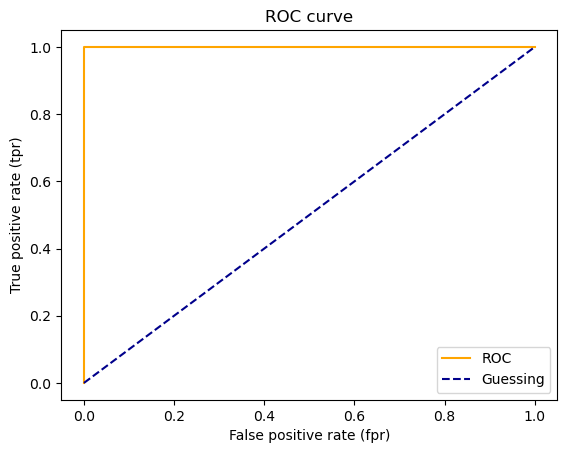

In [81]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="Orange", label="ROC")
    #Plot line with no prediction power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("ROC curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [83]:
roc_auc_score(y_test, y_probs_positive)

1.0

In [84]:
y_preds = model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [88]:
feature_importances = model.feature_importances_


for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

age: 0.0778176000678327
sex: 0.028488766530857204
cp: 0.13343648254356844
trestbps: 0.07325510355027841
chol: 0.0833181725528277
fbs: 0.009010077875203774
restecg: 0.020627794936399244
thalach: 0.11115017042215479
exang: 0.04690084193975433
oldpeak: 0.10810444045497118
slope: 0.04885492448467941
ca: 0.13171255525278822
thal: 0.12732306938868462


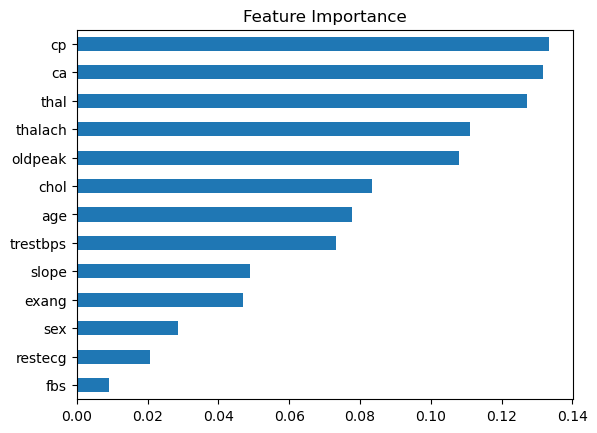

In [91]:
features_df = pd.DataFrame({'Feature Importance': feature_importances}, index=X.columns)

# Plot the bar chart
features_df.sort_values(by='Feature Importance', ascending=True).plot(kind='barh', legend=False)
plt.title("Feature Importance")
plt.show()

In [92]:
import joblib

joblib.dump(model, 'model.pkl')

# To load the model later
loaded_model = joblib.load('model.pkl')
